### Homework 3

Suppose we have a dataset that shows the number of bedrooms and the selling price for 20 houses in a particular neighborhood:

Bedrooms = [1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6]<br>
Prices = [120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488]<br>

Using the Bedrooms data points:
1. Extract a random sample of size 10
2. Compute the mean and standard deviation of the sample
3. Compute the the mean of the population
4. Compute the confidence interval of 95% using the sample 
5. Check if the population mean lies between the upper and lower bounds of the interval

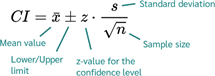

In [2]:
# imports for all exercises in this notebook
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# define the data
bedrooms = np.array([1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6])

# extract a random sample of size 10
sample = np.array(pd.DataFrame(bedrooms).sample(10))

# compute the mean and standard deviation of the sample
m_sample = sample.mean()
s_sample = sample.std()
print(f'sample mean ± std  = {m_sample:.2f} ± {s_sample:.2f}')

# compute the mean of the population
m_pop = bedrooms.mean()
print(f'pop mean           = {m_pop:.2f}')

# compute the confidence interval of 95% using the sample 
z = stats.norm.ppf(.975)
CI_lower = m_sample - z * s_sample / np.sqrt(len(bedrooms))
CI_upper = m_sample + z * s_sample / np.sqrt(len(bedrooms))
print(f'95% CI             = [{CI_lower:.2f}, {CI_upper:.2f}]')

# check if the population mean lies between the upper and lower bounds of the interval
print(f'pop mean within CI = {CI_lower < m_pop < CI_upper}')

sample mean ± std  = 2.90 ± 1.30
pop mean           = 3.00
95% CI             = [2.33, 3.47]
pop mean within CI = True


Using both of the Bedrooms and the Prices:
* Compute the covariance and the correlation between the two variables
* Build a regression model and estimate the regression parameters (slope and intercept).
* Predict the house price for a house with 7 rooms
* Estimate the upper bound and the lower bounds of the prediction interval of a house with 7 rooms
  * Alpha = 0.1
  * N = 20
  * Df = N-2
  
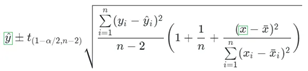


In [3]:
# the data
bedrooms = np.array([1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6])
prices = np.array([120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488])

# compute the covariance and the correlation between the two variables
cov = np.cov(bedrooms, prices)
corr = np.corrcoef(bedrooms, prices)
print(f'covariance matrix:\n{cov}\n')
print(f'correlation matrix:\n{corr}\n')

# build a regression model and estimate the regression parameters (slope and intercept)
model = LinearRegression()
model.fit(bedrooms.reshape((-1,1)), prices)
print(f'intercept = {model.intercept_:.2f}')
print(f'slope     = {model.coef_[0]:.2f}\n')

# predict the house price for a house with 7 rooms
print(f'predicted price for a house with 7 rooms\n= {model.intercept_:.2f} + {model.coef_[0]:.2f}*7\n= {model.intercept_ + model.coef_[0]*7:.2f}\n')

# estimate the upper bound and the lower bound of the 90% prediction interval of a house with 7 rooms
alpha = 0.1
n = len(bedrooms)
df = n-2
x_pred = 7
y_pred = model.intercept_ + model.coef_[0]*x_pred
tval = stats.t.ppf(1-alpha/2,df)
EV = np.square(prices - model.predict(bedrooms.reshape((-1,1)))).sum()/df                             # error variance
PV = np.sqrt(1 + 1/n + np.square(x_pred-bedrooms.mean())/np.square(bedrooms - bedrooms.mean()).sum()) # prediction variance

PI_lower = y_pred - tval * np.sqrt(EV*PV)
PI_upper = y_pred + tval * np.sqrt(EV*PV)
print(f'{round(100*(1-alpha))}% prediction interval\n= [{PI_lower:.2f}, {PI_upper:.2f}]')

covariance matrix:
[[1.89473684e+00 1.33894737e+02]
 [1.33894737e+02 1.00161553e+04]]

correlation matrix:
[[1.         0.97193793]
 [0.97193793 1.        ]]

intercept = 39.45
slope     = 70.67

predicted price for a house with 7 rooms
= 39.45 + 70.67*7
= 534.12

90% prediction interval
= [487.74, 580.49]


## Exercise
Using as sample of houses that have only 3 bedrooms:
* Try to find the lower price that can be payed for a house with 3 rooms using Tolerance interval
* Try  to find the highest price that can be payed for a house with 3 rooms using Tolerance interval

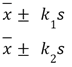

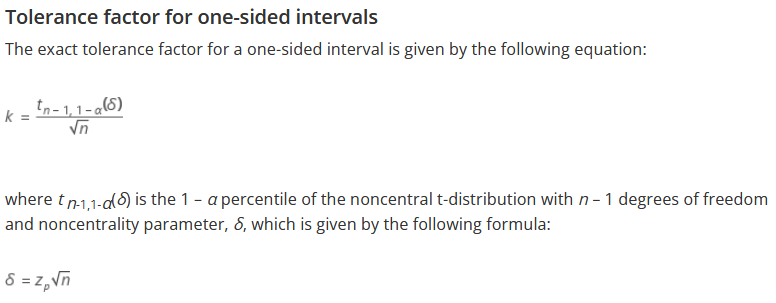

In [10]:
# the exercise reads as if the purpose is to compute two one-sided tolerance bounds (first a lower then an upper)
y = prices[bedrooms == 3]
n = len(y)
alpha = 0.05
df = len(y) - 1
nc = stats.norm.ppf(.95) * np.sqrt(n)
k1 = stats.nct.ppf(alpha, df, nc)
lower_price = np.mean(y) - k1*np.std(y)
highest_price = np.mean(y) + k1*np.std(y)
print(f'We have 95% confidence that 95% of the prices are above {lower_price:.2f}')
print(f'We have 95% confidence that 95% of the prices are below = {highest_price:.2f}')

# for k2:
k2 = stats.t.ppf(1 - alpha/2, n-1) * np.sqrt((n+1)/n)
print(f'We have 95% confidence that 95% of the prices are above {lower_price:.2f}')
print(f'We have 95% confidence that 95% of the prices are below = {highest_price:.2f}')


We have 95% confidence that 95% of the prices are above 177.71
We have 95% confidence that 95% of the prices are below = 315.43
t = 2.4469118487916806
k2 = 2.615858798233164


**Some Extra stuff**

Try to use these Formulas as well and compare the results

We use the following formula to calculate a confidence interval:<br>
ŷ0  +/-  tα/2,n-2 * Syx√((x0 – x̄)2/SSx + 1/n)<br>

We use the following formula to calculate a prediction interval:<br>
ŷ0  +/-  tα/2,n-2 * Syx√((x0 – x̄)2/SSx + 1/n + 1)<br>

where:
* ŷ0: Estimated mean value of response variable
* tα/2,n-2: t-critical value with n-2 degrees of freedom
* Syx: Standard error of response variable
* x0: specific value of predictor variable 
* x̄: mean value of predictor variable
* SSx: Sum of squares for predictor variable
* n: Total sample size


In [15]:
# one way to compute (two-sided) z for a given alpha value:
alpha = .95
z = stats.norm.ppf(0.5 + alpha/2)
print(f'alpha = {alpha:.2}, z = {z:.2f}')

alpha = 0.95, z = 1.96
